# Glass Classification

This is a Glass Identification Data Set from UCI. It contains 10 attributes including id, available at https://www.kaggle.com/uciml/glass

The aim of this notebook is to find an algorithm that can correctly classify a glass sample into one of the 7 types based on the chemical composition and refractive index.

1. Overview
2. Importing libraries and reading the data
3. Exploratory data analysis
4. Machine learning models  
4.1 K-nearest neighbours
4.2 Decision trees
4.3 Random forests


## 1. Overview

Attribute Information:

Id number: 1 to 214 (removed from CSV file)  
RI: refractive index  
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)  
Mg: Magnesium  
Al: Aluminum  
Si: Silicon  
K: Potassium  
Ca: Calcium  
Ba: Barium  
Fe: Iron  
Type of glass: (class attribute)  

-- 1 buildingwindowsfloatprocessed  
-- 2 buildingwindowsnonfloatprocessed  
-- 3 vehiclewindowsfloatprocessed  
-- 4 vehiclewindowsnonfloatprocessed (none in this database)  
-- 5 containers  
-- 6 tableware  
-- 7 headlamps  

## 2. Importing libraries and reading the data

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [312]:
df = pd.read_csv('glass.csv')

Let's take a look at the data

In [313]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


So everythng is numeric and there are no null values. However, the dataset is a little small for a training a reliable model, but let's have a go.

## 3. Exploratory data analysis

Let's start by looking at what we ultimately want to classify. Let's see the count of each type of glass in the dataset

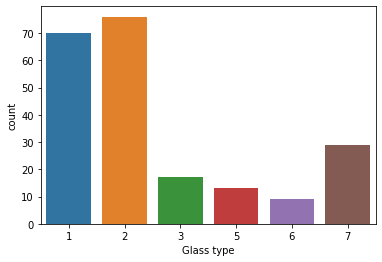

In [315]:
fig = sns.countplot(x='Type',data=df)
plt.xlabel('Glass type')
plt.show(fig)

### Composition

Now let's look at the distribution of each element in the dataset. Si makes up >70% compared to the other elements which are all <20% so we'll leave Si out of this plot

In [316]:
compositions = df[['Na', 'Mg', 'Al', 'K', 'Ca', 'Ba', 'Fe']]
cols = list(compositions.columns) 
cols

['Na', 'Mg', 'Al', 'K', 'Ca', 'Ba', 'Fe']

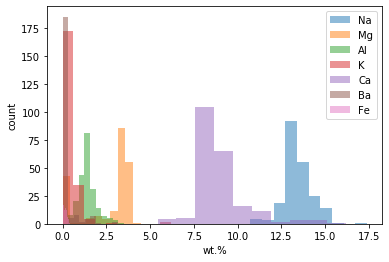

In [317]:
for col in cols:
    plt.hist(df[col], alpha = 0.5, label=col)
    
plt.xlabel('wt.%')
plt.ylabel('count')
plt.legend()
plt.show(fig)

So there's a broader distribution of and a higher percentage of Na and Ca amongst the various glass types compared to the other elements

### Refreactive Index

Let's see what the distribution of refractive index (RI) is

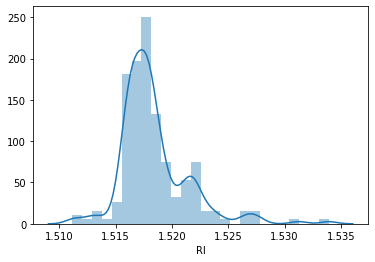

In [318]:
sns.distplot(df['RI'])

What does the RI look like by glass type?

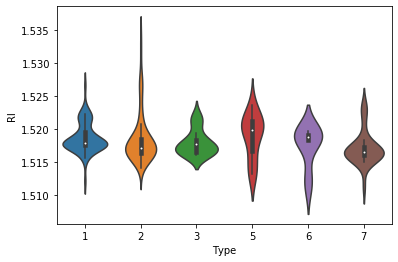

In [319]:
sns.violinplot(x='Type',y='RI',data=df)

### Correlation

Let's see if there is any strong correlation between the features

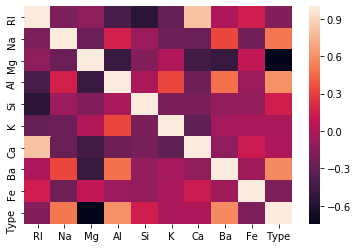

In [320]:
sns.heatmap(df.corr())

Not much to see intuitavely

C:\Users\Benjamin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Benjamin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


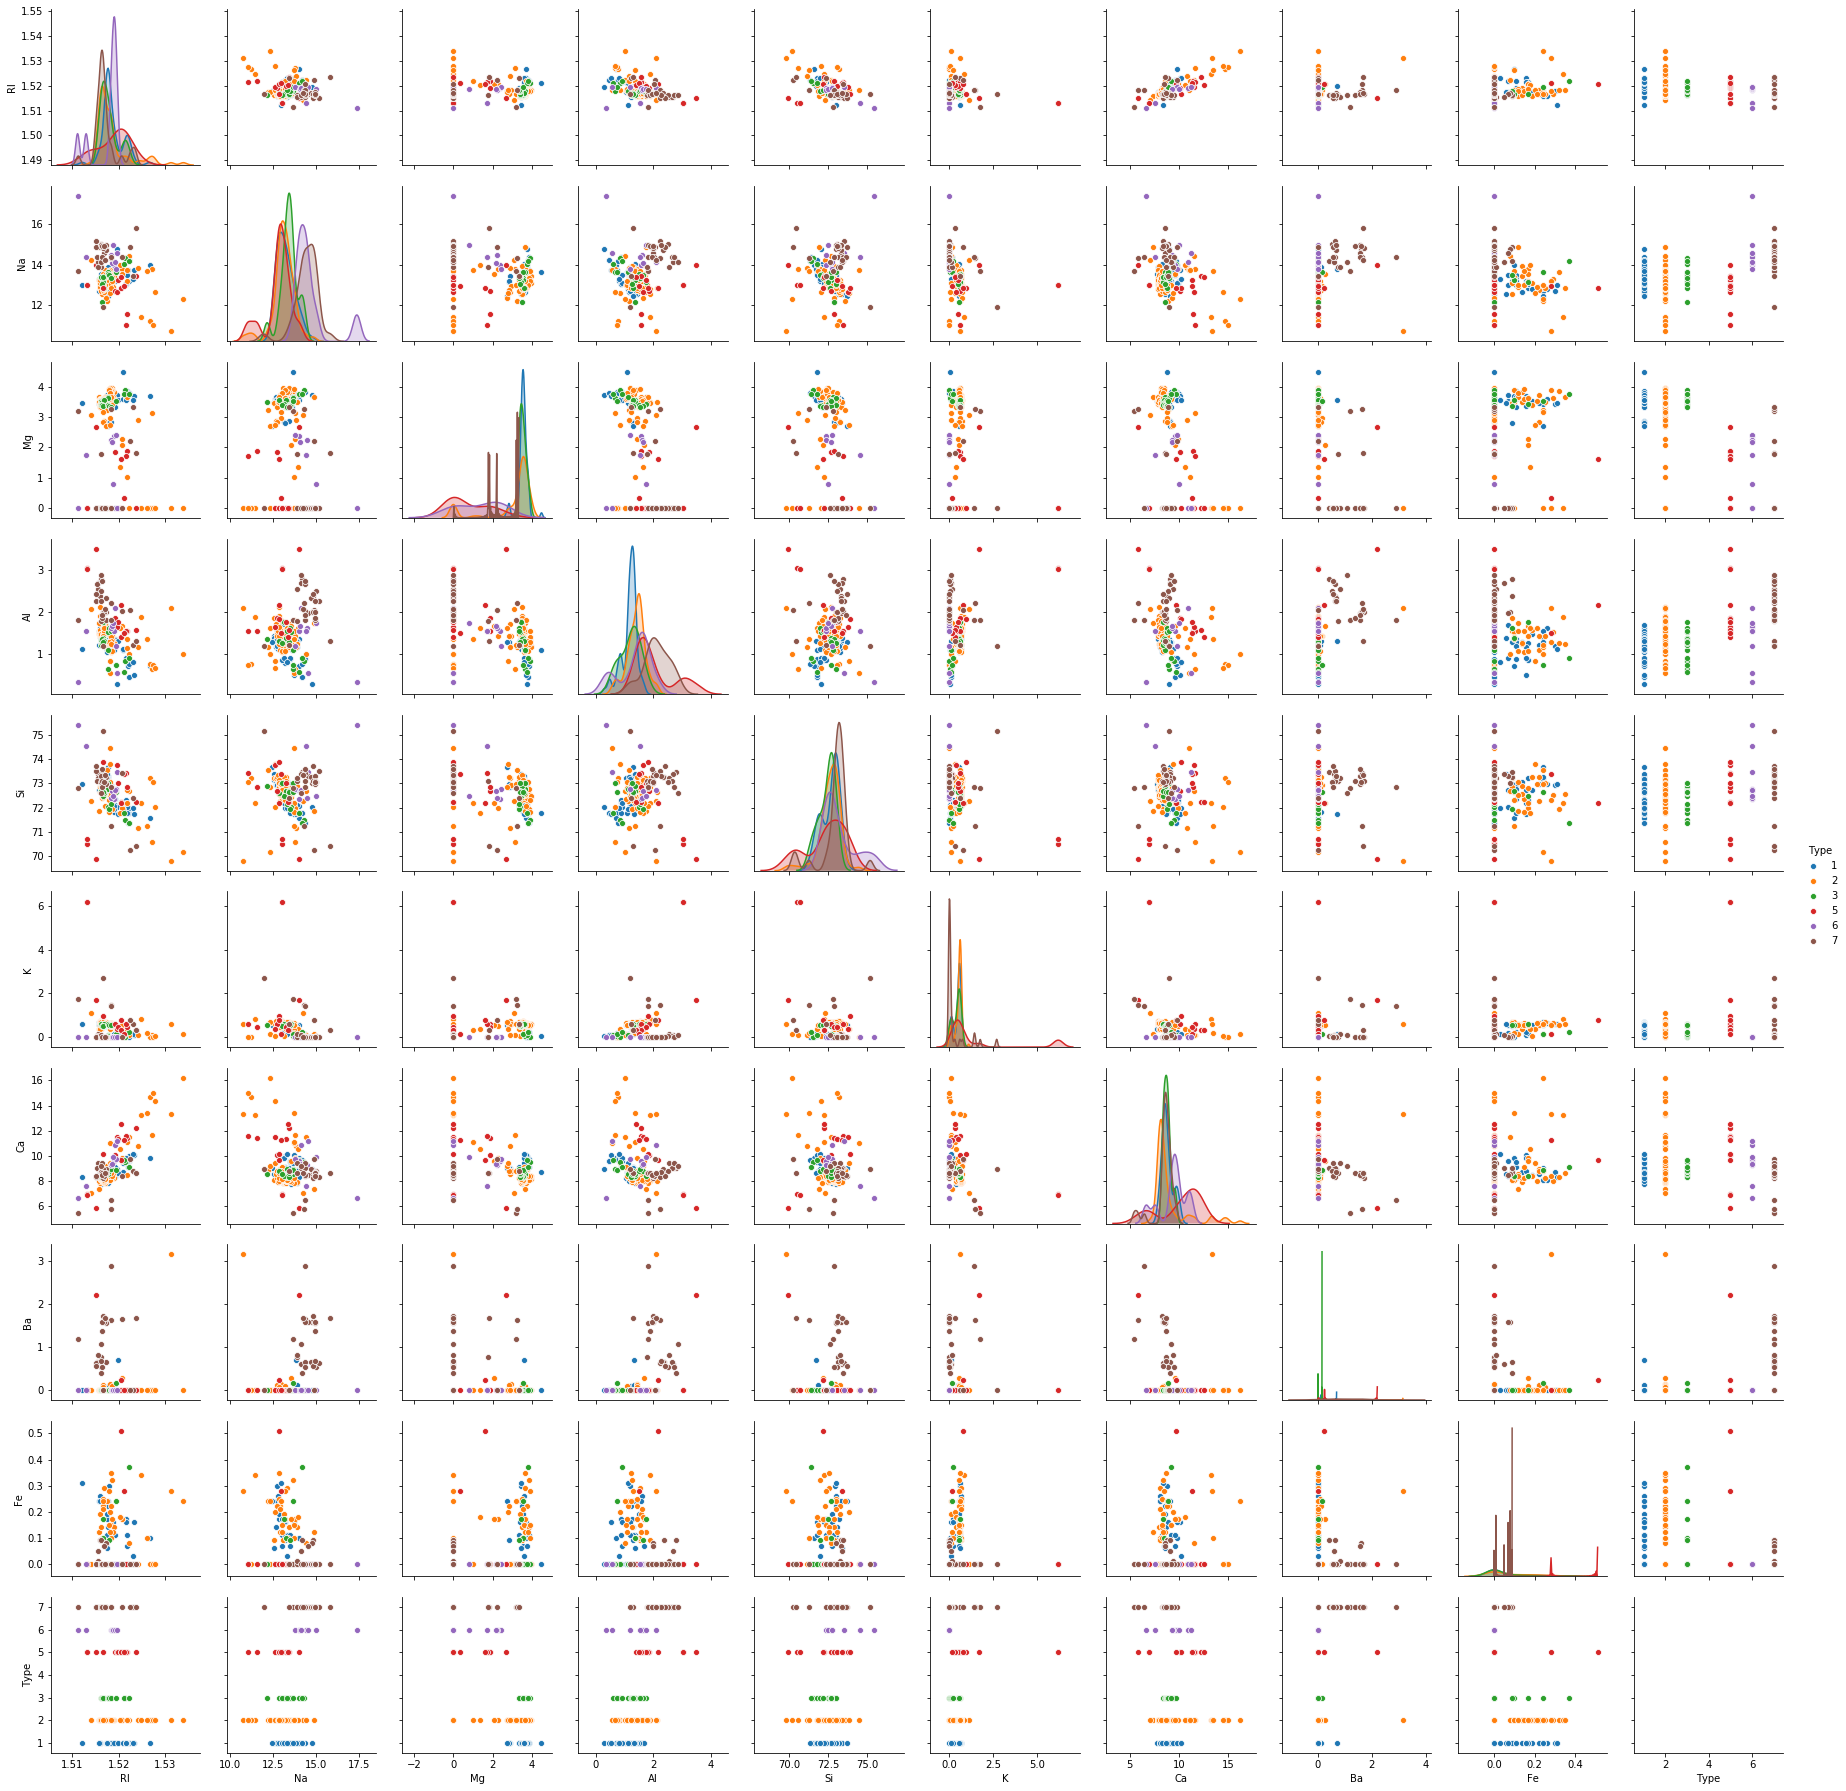

In [351]:
sns.pairplot(data=df, hue='Type')

## 4. Machine learning models

This is a mtlui-class classification problem.

Popular algorithms that can be used for multi-class classification include:  

* k-Nearest Neighbors  
* Decision Trees
* Random Forest

## 4.1 K-nearest neighbours

KNN is one ML model used for classification. In KNN, An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small).

Let's see how well this model works to predict the glass type based off the chemical composition and refractive index

### Standardise the variables

The features (compositions and RI) need to be standardised for the ML model.

If not, any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [321]:
from sklearn.preprocessing import StandardScaler

Let's create a StandardScaler() object called scaler.

In [322]:
scaler = StandardScaler()

Now let's fit scaler to the features

In [323]:
scaler.fit(df.drop('Type',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

Now we use the .transform() method to transform the features to a scaled version.

In [324]:
scaled_features = scaler.transform(df.drop('Type',axis=1))
scaled_features

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

And convert the scaled features to a dataframe

In [325]:
df_feat = pd.DataFrame(data=scaled_features, columns=df.columns[:-1])
df_feat.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


Let's check that they scaled alright

In [326]:
df_feat.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

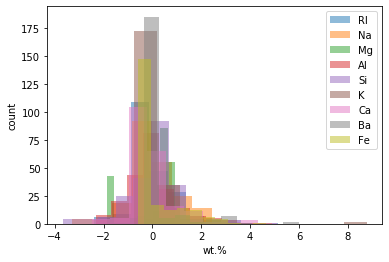

In [327]:
for col in df_feat.columns:
    plt.hist(df_feat[col], alpha = 0.5, label=col)
    
plt.xlabel('wt.%')
plt.ylabel('count')
plt.legend()
plt.show(fig)

### Train Test Split

In [328]:
from sklearn.model_selection import train_test_split

In [329]:
X = df_feat
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Using KNN

Let's just try first with k=1

In [330]:
from sklearn.neighbors import KNeighborsClassifier

In [331]:
knn = KNeighborsClassifier(n_neighbors=1)

In [332]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Predictions and Evaluations

Let's evaluate our KNN model

In [333]:
knn_predictions = knn.predict(X_test)

In [334]:
from sklearn.metrics import classification_report,confusion_matrix

In [335]:
print(confusion_matrix(y_test,knn_predictions))

[[16  2  0  0  0  0]
 [ 3  7  0  0  0  0]
 [ 2  3  1  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  1  0  2]]


In [336]:
print(classification_report(y_test,knn_predictions))

              precision    recall  f1-score   support

           1       0.76      0.89      0.82        18
           2       0.54      0.70      0.61        10
           3       1.00      0.17      0.29         6
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         2
           7       1.00      0.67      0.80         3

    accuracy                           0.72        43
   macro avg       0.84      0.70      0.71        43
weighted avg       0.77      0.72      0.70        43



### Choosing a K Value

Let's use the elbow method to pick a good K Value:

In [337]:
error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

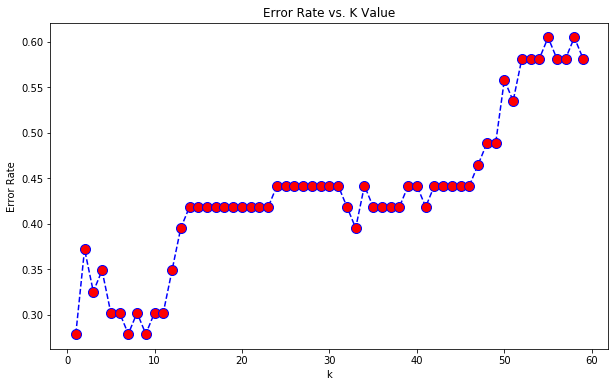

In [338]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('k')
plt.ylabel('Error Rate')

So the minimum error rate is the same at k=1 and k=7. After that, as k increases, the error rate goes up.

### Retrain with new k Value

Let's retrain the model with the k=7 and re-do the classification report and the confusion matrix to see if there's an improvement.

In [339]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knn_predictions_7 = knn.predict(X_test)

In [340]:
print('WITH k=7')
print(confusion_matrix(y_test, knn_predictions_7))
print(classification_report(y_test, knn_predictions_7))

WITH k=7
[[17  1  0  0  0  0]
 [ 1  9  0  0  0  0]
 [ 4  2  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  1  1]
 [ 0  1  0  0  0  2]]
              precision    recall  f1-score   support

           1       0.77      0.94      0.85        18
           2       0.60      0.90      0.72        10
           3       0.00      0.00      0.00         6
           5       1.00      0.50      0.67         4
           6       1.00      0.50      0.67         2
           7       0.67      0.67      0.67         3

    accuracy                           0.72        43
   macro avg       0.67      0.59      0.59        43
weighted avg       0.65      0.72      0.66        43



C:\Users\Benjamin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


So the model using k=7 is actually worse. Let's see if some other models work better.

## 4.2 Decision Trees

We'll start just by training a single decision tree.

In [341]:
from sklearn.tree import DecisionTreeClassifier

In [342]:
dtree = DecisionTreeClassifier()

In [343]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Prediction and Evaluation 

Let's evaluate our decision tree.

In [345]:
dtree_predictions = dtree.predict(X_test)

In [347]:
print(confusion_matrix(y_test, dtree_predictions))
print(classification_report(y_test, dtree_predictions))

[[14  1  1  0  0  2]
 [ 3  6  1  0  0  0]
 [ 1  4  1  0  0  0]
 [ 0  2  0  2  0  0]
 [ 1  0  0  0  1  0]
 [ 1  0  0  0  0  2]]
              precision    recall  f1-score   support

           1       0.70      0.78      0.74        18
           2       0.46      0.60      0.52        10
           3       0.33      0.17      0.22         6
           5       1.00      0.50      0.67         4
           6       1.00      0.50      0.67         2
           7       0.50      0.67      0.57         3

    accuracy                           0.60        43
   macro avg       0.67      0.54      0.56        43
weighted avg       0.62      0.60      0.59        43



## 4.3 Random Forests

Now let's compare the decision tree model to a random forest.

In [348]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [349]:
rfc_predictions = rfc.predict(X_test)

In [350]:
print(confusion_matrix(y_test,rfc_predictions))
print(classification_report(y_test,rfc_predictions))

[[15  3  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 3  2  1  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  2]]
              precision    recall  f1-score   support

           1       0.83      0.83      0.83        18
           2       0.59      1.00      0.74        10
           3       1.00      0.17      0.29         6
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         2
           7       1.00      0.67      0.80         3

    accuracy                           0.77        43
   macro avg       0.90      0.74      0.75        43
weighted avg       0.83      0.77      0.74        43



So, it looks like the random forests model worked the best, although it could be better. This is could be due to the small train sample size.